In [18]:
%pip install numpy pandas tqdm scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
import pandas as pd

from source.mlp import MLP

In [20]:
dfm=pd.read_csv('datasets/dataset.csv', delimiter = ",", names=['class-label','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])
dfm

,class-label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8414,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


In [21]:
dfm.describe()

,class-label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,...,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
freq,4488,3796,3268,2320,5040,3808,8200,6824,5880,1728,...,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160


In [22]:
dfm.isna().sum()

class-label                 0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

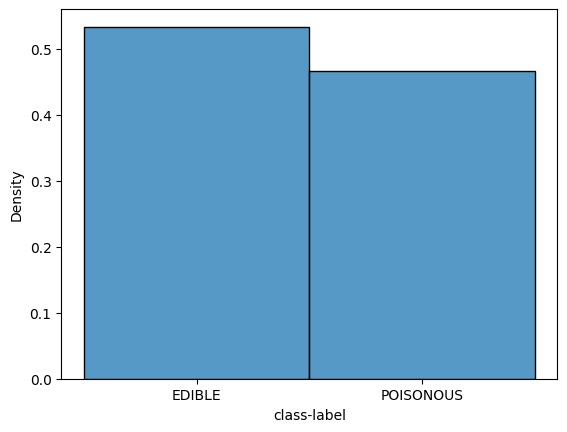

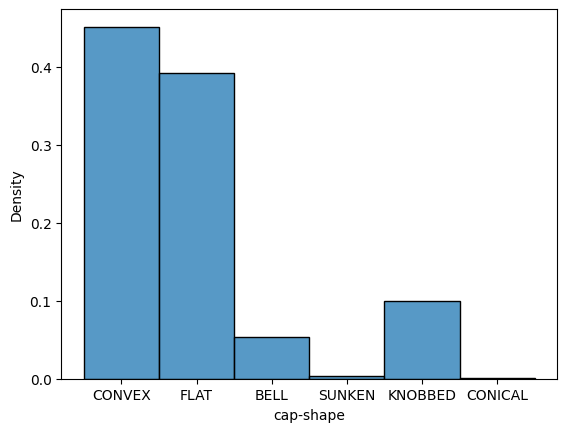

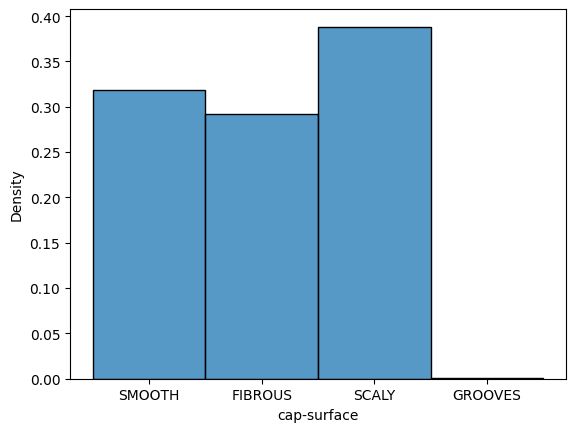

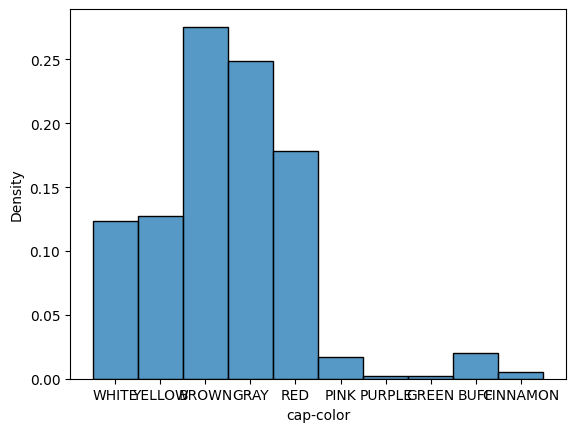

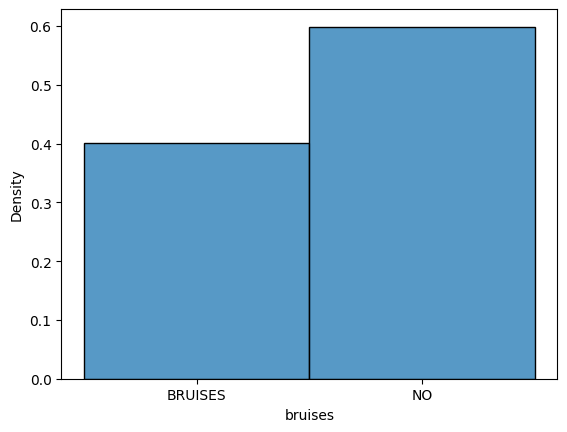

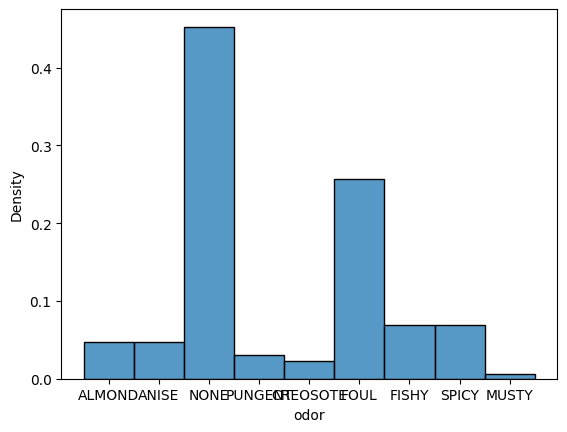

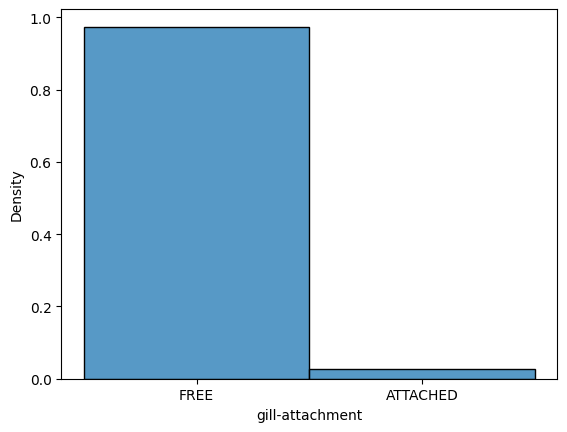

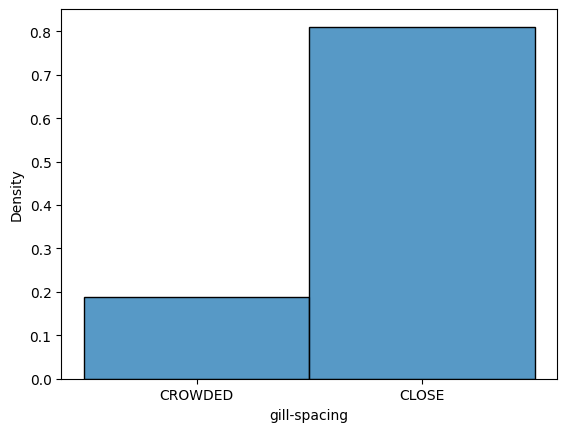

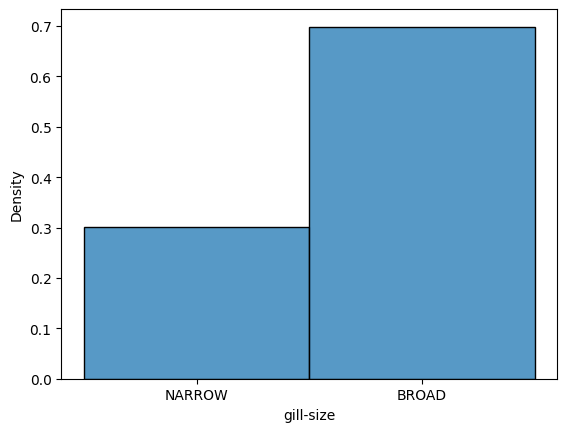

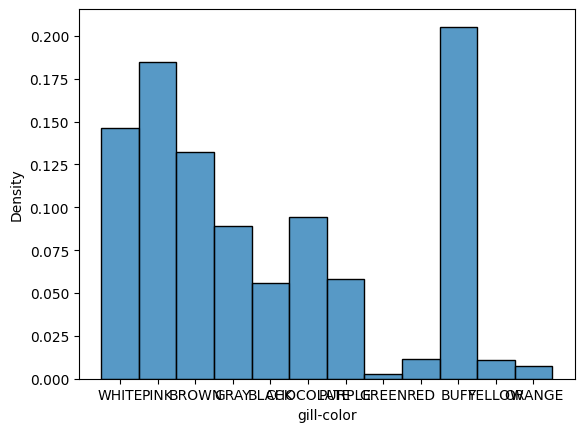

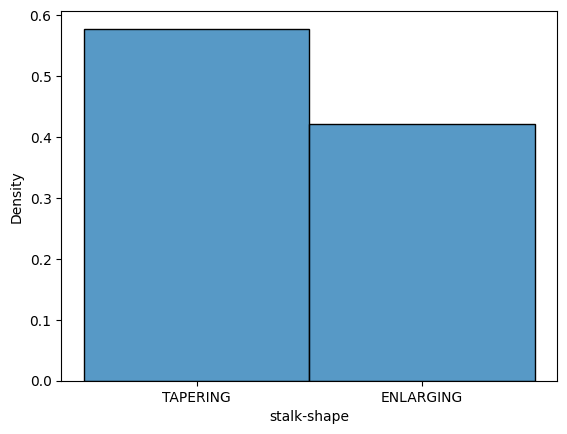

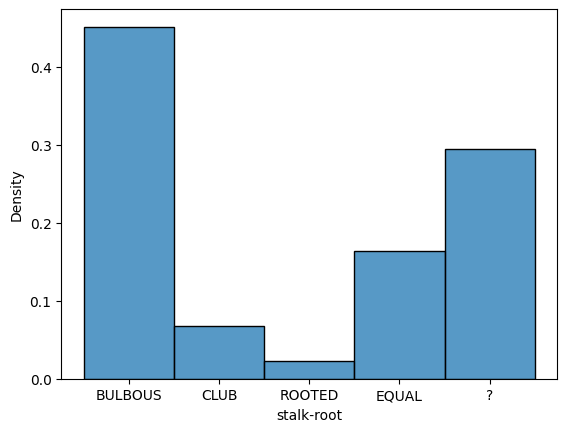

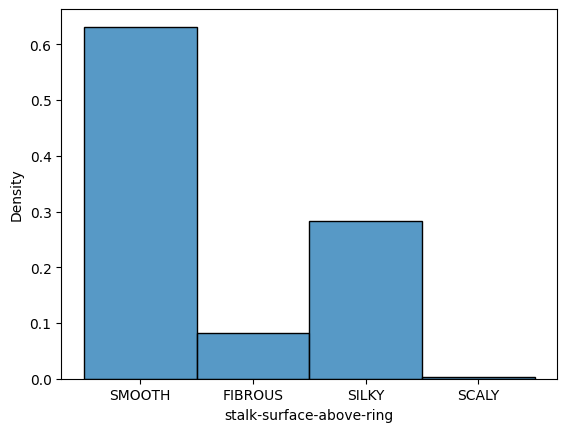

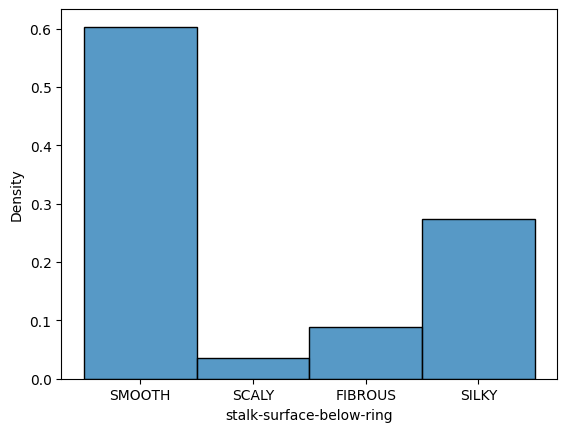

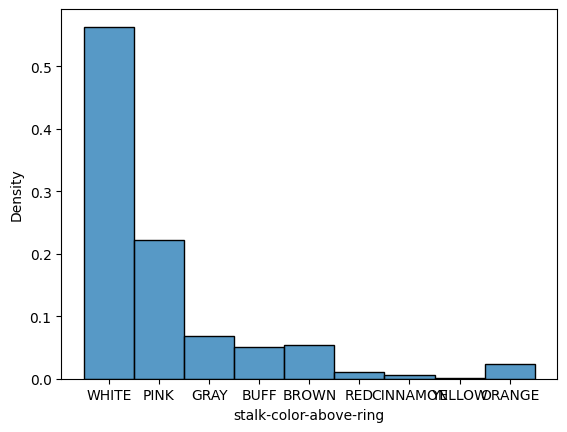

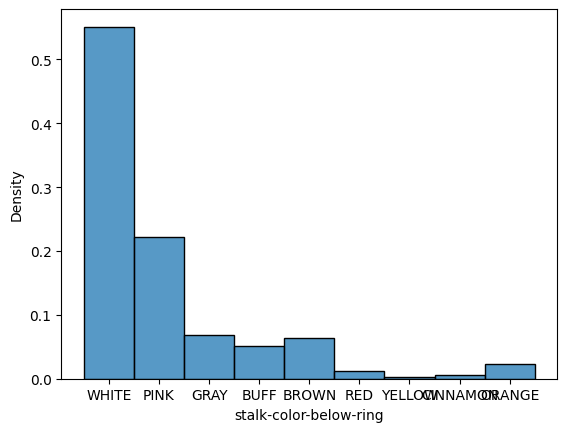

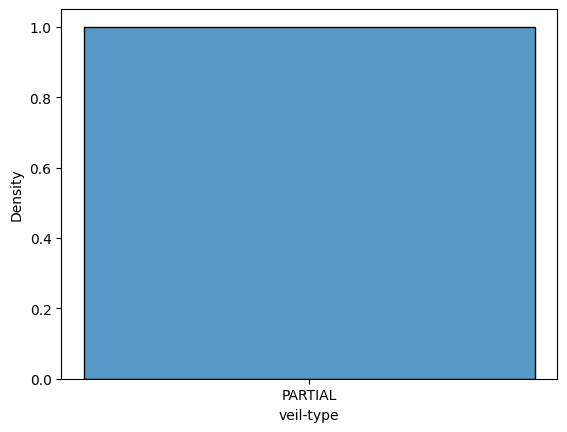

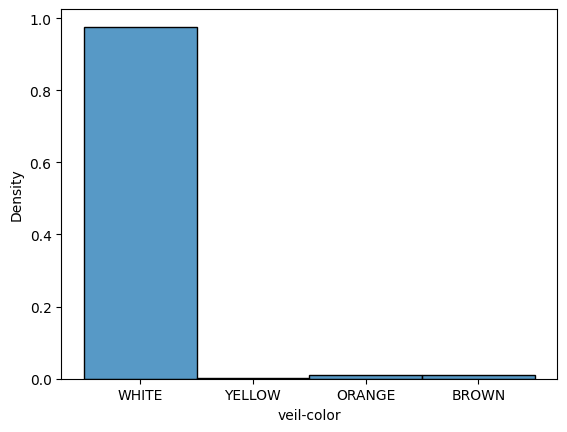

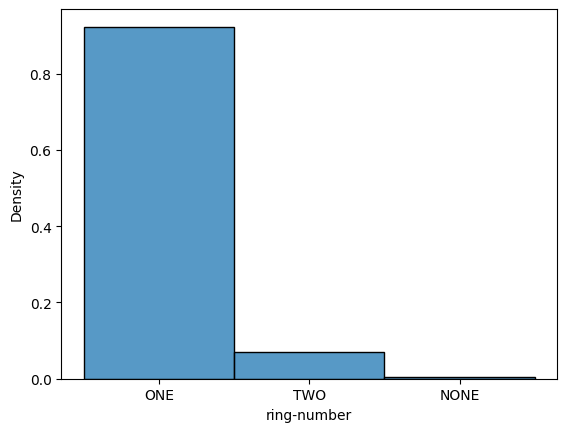

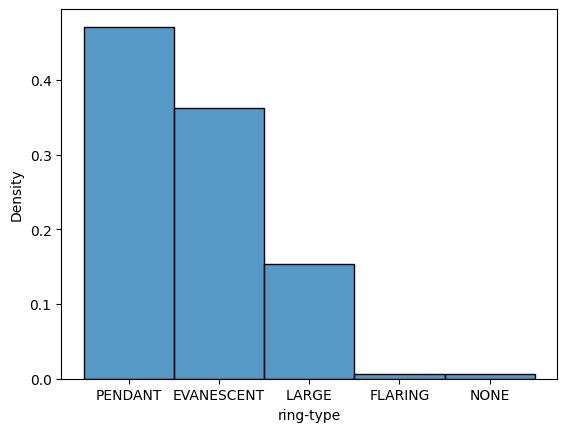

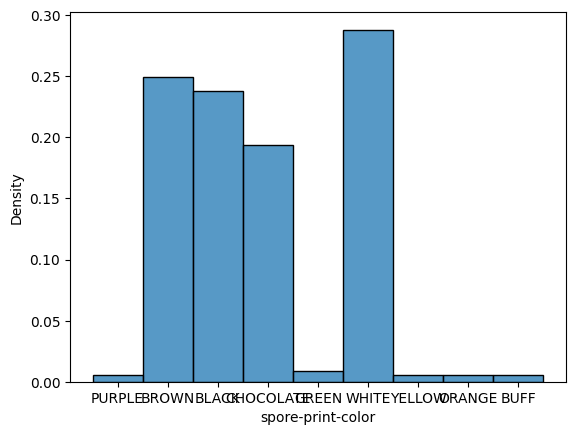

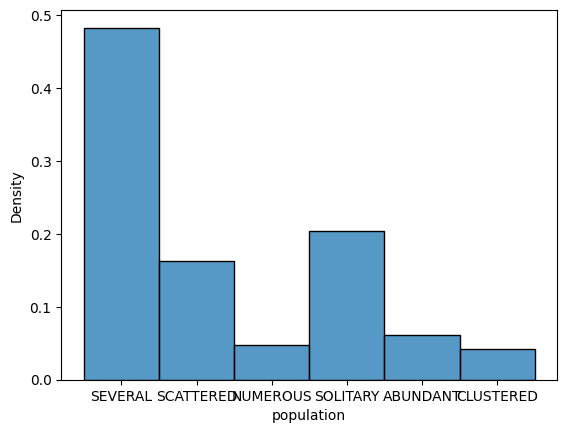

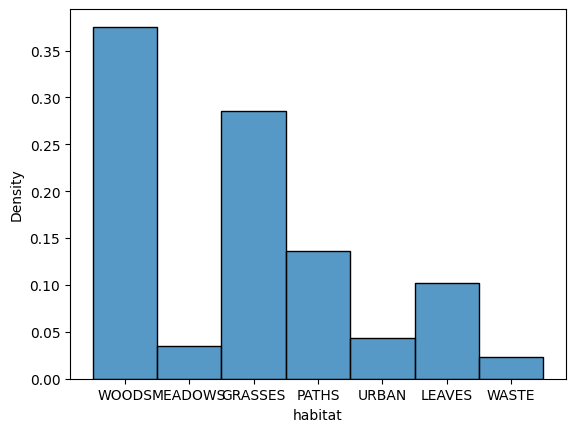

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in dfm.columns:
    plt.figure(i)
    sns.histplot(dfm[i],stat="density")
    plt.show()

In [24]:
from sklearn import preprocessing

dfm1 = dfm.copy()
le = preprocessing.LabelEncoder()
for column_name in dfm.columns:
    dfm1[column_name]=le.fit_transform(dfm1[column_name])
Y=dfm1.iloc[:, 0:1].values.ravel()
X=dfm1.iloc[:, 1:23]

<Axes: >

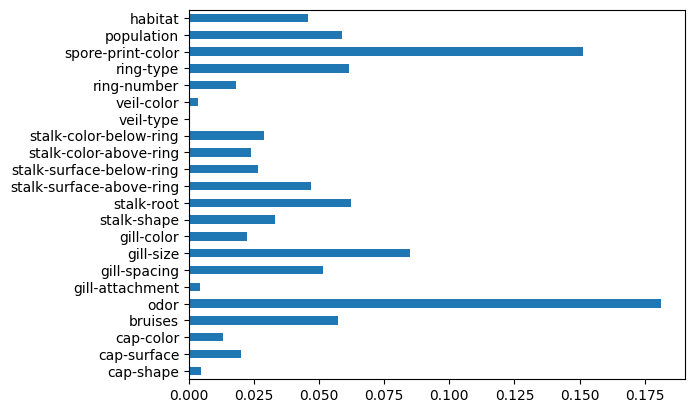

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy', random_state=0)
clf.fit(X, Y)

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

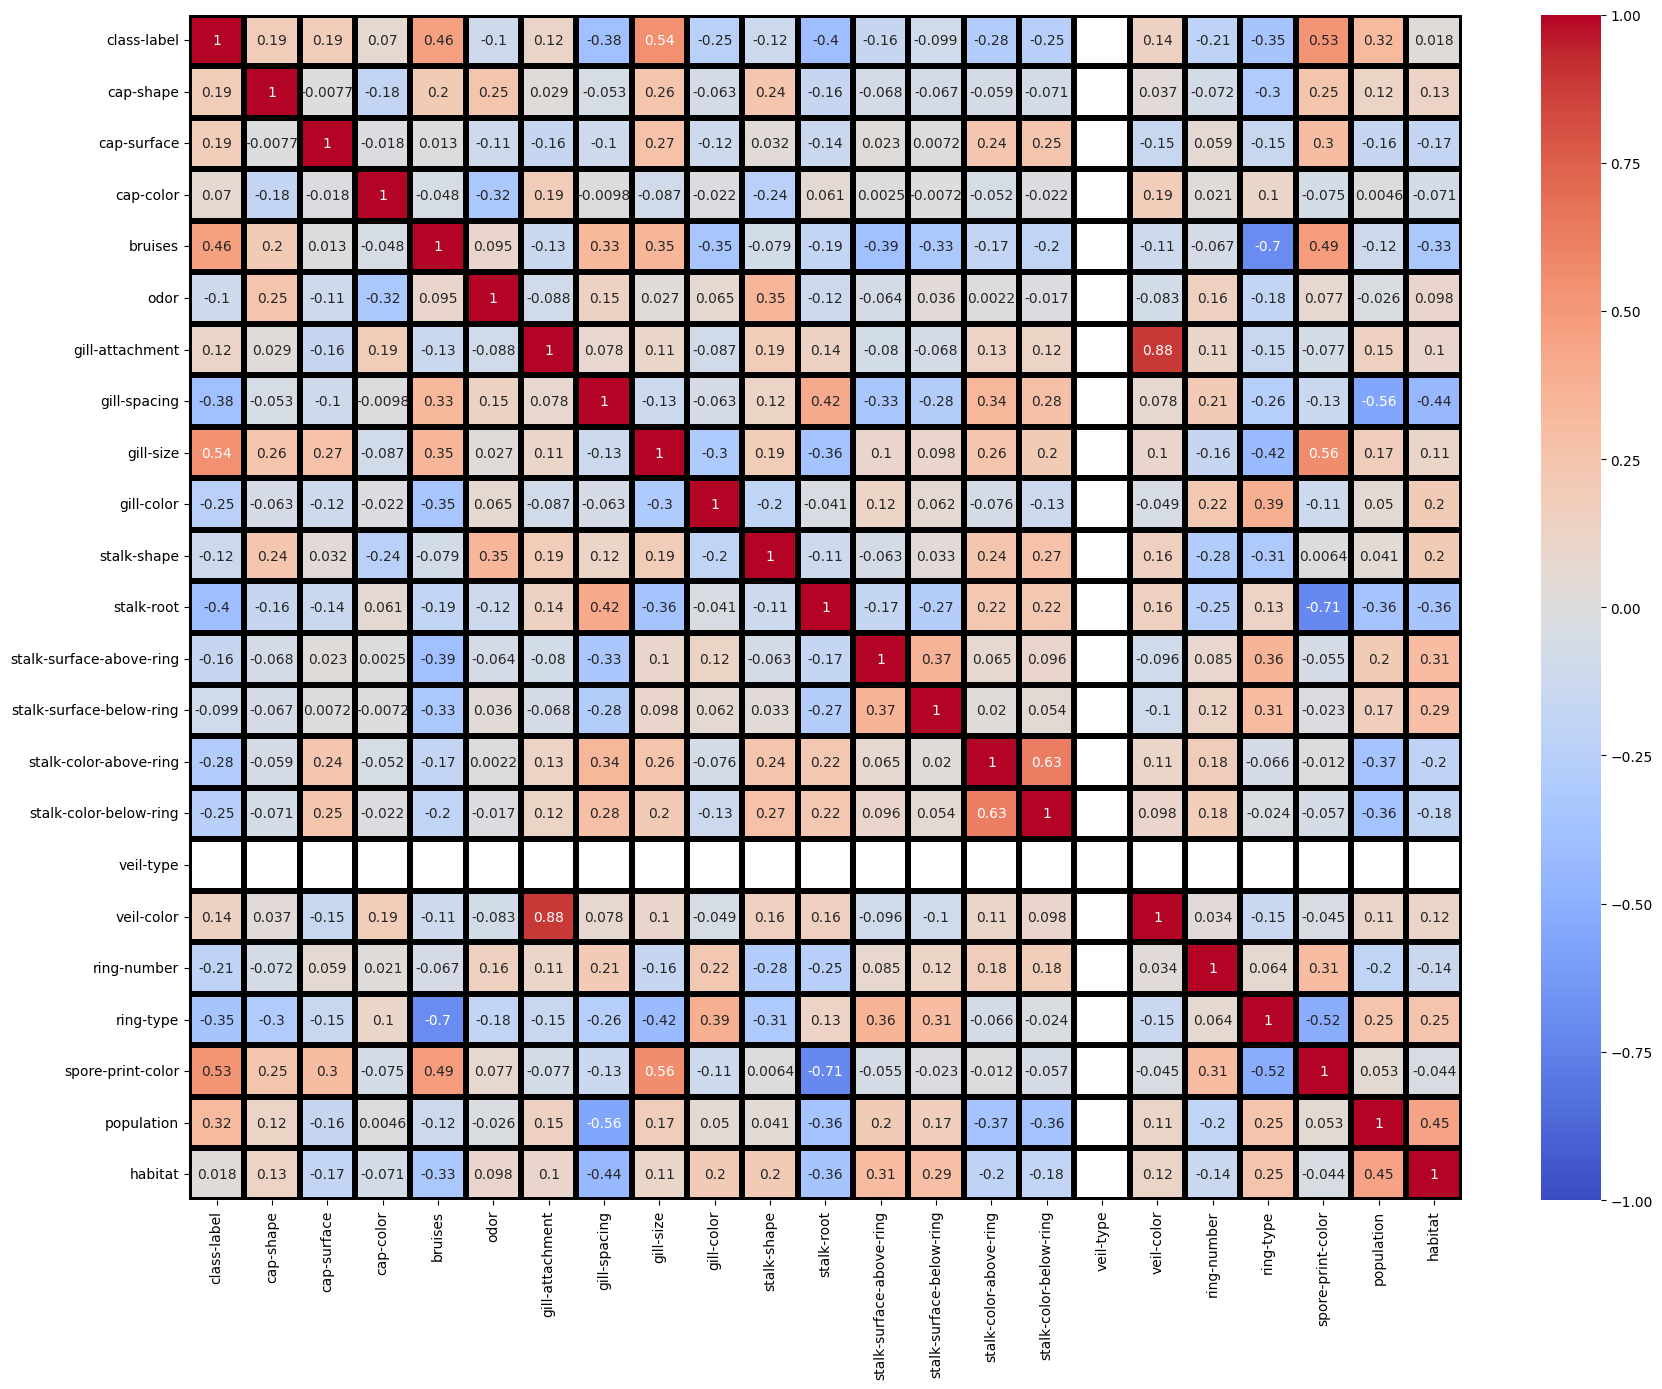

In [26]:
fig = plt.figure(figsize=(18, 14))
sns.heatmap(dfm1.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
fig.tight_layout()
plt.show()

In [27]:
df_encoded = pd.get_dummies(dfm, columns=['cap-shape','cap-surface','cap-color','bruises','odor',
                                         'gill-attachment','gill-spacing','gill-size','gill-color',
                                         'stalk-shape','stalk-root','stalk-surface-above-ring',
                                         'stalk-surface-below-ring','stalk-color-above-ring',
                                         'stalk-color-below-ring','veil-type','veil-color',
                                         'ring-number','ring-type','spore-print-color',
                                         'population','habitat'])

df_encoded['class-label'] = dfm['class-label'].map({'EDIBLE': 0, 'POISONOUS': 1})

X = df_encoded.drop('class-label', axis=1)
y = df_encoded['class-label']

print(f"Original shape: {dfm.shape}")
print(f"Encoded shape: {X.shape}")
print(f"Number of features after encoding: {X.shape[1]}")

Original shape: (8416, 23)
Encoded shape: (8416, 117)
Number of features after encoding: 117


In [28]:
X

,cap-shape_BELL,cap-shape_CONICAL,cap-shape_CONVEX,cap-shape_FLAT,cap-shape_KNOBBED,cap-shape_SUNKEN,cap-surface_FIBROUS,cap-surface_GROOVES,cap-surface_SCALY,cap-surface_SMOOTH,...,population_SCATTERED,population_SEVERAL,population_SOLITARY,habitat_GRASSES,habitat_LEAVES,habitat_MEADOWS,habitat_PATHS,habitat_URBAN,habitat_WASTE,habitat_WOODS
0,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
8412,False,False,False,False,True,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False
8413,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
8414,False,False,False,False,True,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False


In [29]:
from sklearn.model_selection import train_test_split

X = np.array(X, dtype=int)
y = np.array(y, dtype=int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], shape=(6732, 117))

In [31]:
y_train

array([0, 0, 1, ..., 1, 0, 1], shape=(6732,))

In [32]:
def sig(x):
  return 1 / (1 + np.exp(-x))

def sig_prime(x: float):
  s = sig(x)
  return s * (1 - s)


mlp = MLP(X_train[0].shape[0], 1, [80, 60], sig, sig_prime, 0.05)
mlp.fit(X_train, y_train, epochs=3)

100%|██████████| 3/3 [00:01<00:00,  2.10it/s]


In [33]:
print(list(map(lambda x: round(float(mlp.predict(X_test[x])), 2), range(0, 10))))

print(y_test[0:10])

[0.97, 1.0, 0.0, 0.99, 0.0, 1.0, 0.01, 0.01, 0.01, 0.99]
[1 1 0 1 0 1 0 0 0 1]


/var/folders/2k/j64djv5131g0m2v23qm8g2lm0000gn/T/ipykernel_96422/1244925724.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(list(map(lambda x: round(float(mlp.predict(X_test[x])), 2), range(0, 10))))


Accuracy:  0.9982
Precision: 1.0000
Recall:    0.9962
F1-score:  0.9981


/var/folders/2k/j64djv5131g0m2v23qm8g2lm0000gn/T/ipykernel_96422/1997724865.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_raw = np.array([float(mlp.predict(X_test[i])) for i in range(len(X_test))])


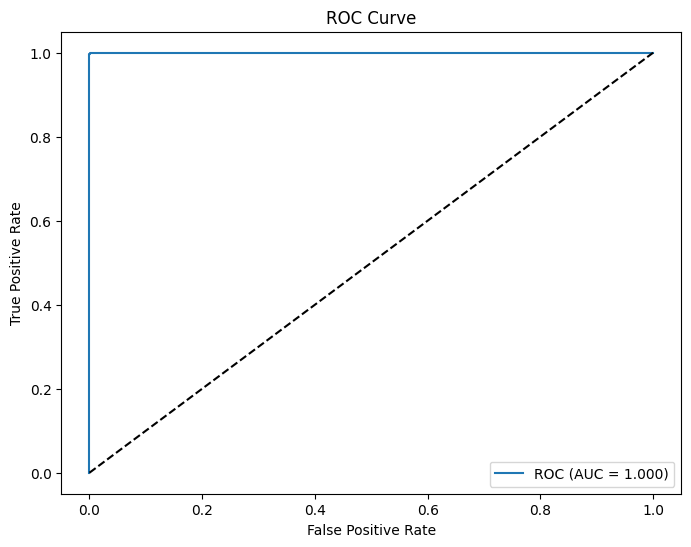

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

y_pred_raw = np.array([float(mlp.predict(X_test[i])) for i in range(len(X_test))])
y_pred = (y_pred_raw > 0.6).astype(int)
y_true = np.array(y_test).flatten()

print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision: {precision_score(y_true, y_pred):.4f}")
print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
print(f"F1-score:  {f1_score(y_true, y_pred):.4f}")

fpr, tpr, _ = roc_curve(y_true, y_pred_raw)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
